In [133]:
import pandas as pd

In [134]:
lll_df  = pd.read_csv("lll_certs.csv")

In [135]:
lll_df.head()

,Name,Link,date,time,platform,type,comments
0,Data Literacy certificate,https://www.datacamp.com/skill-verification/DL...,11-Oct-24,NaN,datacamp,exam,NaN
1,Introduction to SQL,https://www.datacamp.com/completed/statement-o...,NaN,2 hours,datacamp,course,NaN
2,Introduction to Python,https://www.datacamp.com/completed/statement-o...,NaN,4 hours,datacamp,course,NaN
3,Intermediate Python,https://www.datacamp.com/completed/statement-o...,NaN,4 hours,datacamp,course,NaN
4,Introduction to R,https://www.datacamp.com/completed/statement-o...,NaN,4 hours,datacamp,course,NaN


In [136]:
lll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      81 non-null     object
 1   Link      81 non-null     object
 2   date      37 non-null     object
 3   time      79 non-null     object
 4   platform  81 non-null     object
 5   type      81 non-null     object
 6   comments  8 non-null      object
dtypes: object(7)
memory usage: 4.6+ KB


In [137]:
# time and date need there dtype to be adjusted
lll_df["date"] = lll_df["date"].apply(pd.to_datetime)

# the time column has some NaN values that we need to work around
time_index = lll_df.time.notnull()
lll_df.loc[time_index, "time"] = lll_df.loc[time_index, "time"].str.replace(" hours", "").astype(int)

### Missing Dates
Unfortunately, not all the course completion certificates had dates on them.  I may have be able to look them up at a later date in my email.

### Missing Time
The IBM Capstone course didn't provide 

What platforms have I worked on?

In [146]:
platform_counts = lll_df.platform.value_counts()
platform_counts

platform
datacamp    46
coursera    35
Name: count, dtype: int64

[Text(0, 0, '46'), Text(0, 0, '35')]

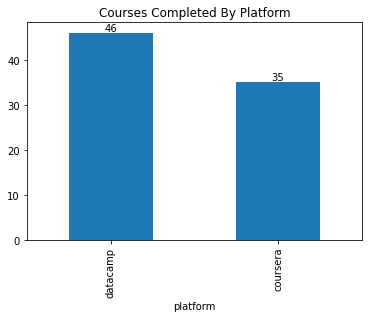

In [150]:
#visualize (https://matplotlib.org/3.4.0/users/whats_new.html#new-automatic-labeling-for-bar-charts)
ax = platform_counts.plot(kind="bar", title="Courses Completed By Platform")
ax.bar_label(ax.containers[0])

What about time on each platform?
Since Datacamp's tracks and Coursera's specializations time esimates are sums of the courses, they need to be filtered so that hours don't get counted twice. 

In [140]:
courses_df = lll_df[lll_df["type"] == "course"]
courses_df[time_index].groupby("platform")["time"].sum()

/tmp/ipykernel_165135/3894101412.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  courses_df[time_index].groupby("platform")["time"].sum()


platform
coursera    409
datacamp    162
Name: time, dtype: object

### Time Series

In [141]:
lll_range = (lll_df['date'].min(), lll_df['date'].max())
lll_range

(Timestamp('2022-04-12 00:00:00'), Timestamp('2025-01-25 00:00:00'))

<Axes: title={'center': 'Courses Complete by Month'}, ylabel='Frequency'>

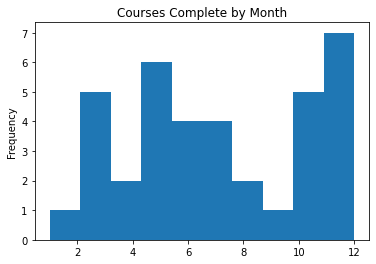

In [153]:
# I seem to complete the most courses in December with a dip in the end of summer
lll_df['date'].dt.month.plot(kind="hist", title="Courses Complete by Month")